#Dan notes:

##Thing to include
###Geotools

* gplates/PyGplates

###General tools

* stackoverflow





#Python for Geospatial data 

* this presentation introduces some of the geospatial capabilities of Python

* our focus will be on the shapely, fiona, & rasterio, libraries

* as well as the GeoPandas library which allows GIS-like organisation / queries

##With all the data formats available...
...how do we use them all together?



##<span style="color:orange">Geospatial Data Abstraction Library (GDAL) & OGR Simple Feature Library</span> 
 
* Read, write, convert, edit, access
* Raster and Vector
* Open Source 'Swiss Army Knife' of data formats
* Open Source Geospatial Foundation (OSGeo) project
* Comes with lots of command line utilities and functions

##<span style="color:orange">JSON / GeoJSON</span> 

JSON (JavaScript Object Notation) is a lightweight data-interchange format.
An object is an unordered set of name/value pairs. An object begins with { (left brace) and ends with } (right brace). Each name is followed by : (colon) and the name/value pairs are separated by , (comma).  


##<span style="color:orange">JSON / GeoJSON</span> 



```
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```

GeoJSON has become a de facto standard on the web.

##<span style="color:orange">JSON / GeoJSON</span> 

* GeoJSON always consists of a single object. This object (referred to as the GeoJSON object below) represents a geometry, feature, or collection of features.


* The GeoJSON object may have any number of members (name/value pairs).


* The GeoJSON object must have a member with the name "type". This member's value is a string that determines the type of the GeoJSON object.



##<span style="color:orange">JSON / GeoJSON</span> 


* The value of the type member must be one of: "Point", "MultiPoint", "LineString", "MultiLineString", "Polygon", "MultiPolygon", "GeometryCollection", "Feature", or "FeatureCollection". The case of the type member values must be as shown here.


* A GeoJSON object may have an optional "crs" member, the value of which must be a coordinate reference system object 


JSON and python play well together because of the affinity between the Json format and python Dictionaries

The json library can parse JSON from strings or files. 

The library parses JSON into a Python dictionary or list. 

It can also convert Python dictionaries or lists into JSON strings.

##<span style="color:green">Shapely & Fiona</span> 

* Fiona is an interface to OGR
* Fiona reads and writes spatial data files
* it's a native GeoJSON speaker
* A Python package at the top
* Extension modules (using Cython) in the middle



##<span style="color:green">Shapely & Fiona</span> 
* Fiona's open() function  gives you a file-like dataset object (in fact an iterator - like a python file is an iterator for lines, this is an iterator for features)

* read() gives you a Numpy ndarray

* next() gives you the next feature record from the iterator

* Records are Python dicts

```
import fiona

with fiona.open(path) as src:
    first = next(src)
``` 

##<span style="color:green">Shapely & Fiona</span> 
* Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library.
* set-theoretic operations are intersection, union, etc.
* manipulations include transforms, duplications
* Also allows relationships to be tested (e.g. point-in-polygon)

## Managing data
###<span style="color:green">Pandas (Python Data Analysis Library)</span>
* Focuses on high-performance, easy-to-use data structures for data analysis
* An integral part of the SciPy ecosystem and widely used by other packages
* Modified BSD Licence

##What About Geospatial Data?
###<span style="color:green">GeoPandas (Python Tools for Geographic Data)</span>
* Adds support for geographic data to pandas objects
* Can act on shapely geometry objects and perform geometric operations
* File and database I/O for geospatial formats
* ...but it retains the dataframe object (and methods) that are at the heart of Pandas,
* Modified BSD Licence

##<span style="color:green">GeoPandas</span> 
###objects
* a GeoSeries is a 1-d object, containing only geometries
* a GeoDataFrame contains a geometry columns - the others could be attributes of any Python kind (ints, floats, strings etc)



In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules 
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Polygon, Point, LineString, MultiPoint
from geopy.distance import great_circle

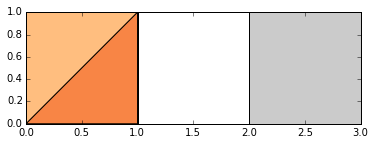

In [2]:
# create a GeoSeries of shapely polygon objects
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

gs = GeoSeries([p1, p2, p3])

# GeoPandas uses descartes to generate a matplotlib plot... let's generate a plot of our GeoSeries
 
gs.plot()

In [3]:
# the area property of a GeoSeries will return a pandas.Series containing the area of each item in the GeoSeries
gs.area

0    0.5
1    1.0
2    1.0
dtype: float64

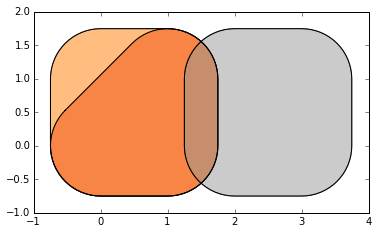

In [4]:
# other operations return GeoPandas objects
buff = gs.buffer(0.75)
buff.plot()

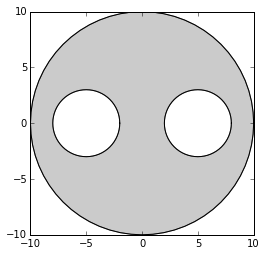

In [5]:
#We can chain together shapely operations 
polygon = Point(0, 0).buffer(10.0).difference(
    MultiPoint([(-5, 0), (5, 0)]).buffer(3.0))
ps = GeoSeries([polygon])
ps.plot()

##A quick aside ... opening .csv w/ <span style="color:green">Pandas</span> 

In [6]:
rs = pd.read_csv('../data/csv/US_Regions_State_Boundaries.csv')
rs.head()

,Region,name,id,geometry,Color
0,Southwest,Nevada,NV,<Polygon><outerBoundaryIs><LinearRing><coordin...,NaN
1,Southwest,Arizona,AZ,<Polygon><outerBoundaryIs><LinearRing><coordin...,NaN
2,Central,Wisconsin,WI,<Polygon><outerBoundaryIs><LinearRing><coordin...,NaN
3,Southeast,Georgia,GA,<Polygon><outerBoundaryIs><LinearRing><coordin...,NaN
4,Central,Kansas,KS,<Polygon><outerBoundaryIs><LinearRing><coordin...,NaN


##Examples with <span style="color:green">GeoPandas</span> 

In [7]:
df = GeoDataFrame.from_file('../data/GIS_prac_2/gpregmeta1m_polygon_geo_gda94.shp')
#Verify the type of the object we just created
print(type(df))
#And print the first few lines using the .head() method
df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,FAC_SERIES,FEATURE,METAGRADE,OBSERVMETH,UFI,geometry
0,None,REGION_META,CAMBRIAN MIGMATITE,COMBINED GEOPHYSICS,35,POLYGON ((141.3902362916667 -36.88460809166666...
1,None,MM_VOID,None,None,36,POLYGON ((148.0333111083333 -36.68651856666666...
2,None,MM_VOID,None,None,37,POLYGON ((142.4450978916667 -36.74425153333333...
3,None,MM_VOID,None,None,38,POLYGON ((148.0351948666667 -36.72699916666667...
4,None,MM_VOID,None,None,39,"POLYGON ((148.002529675 -36.79432698333333, 14..."


In [8]:
df['geometry'].crs

{u'ellps': u'GRS80', u'no_defs': True, u'proj': u'longlat'}

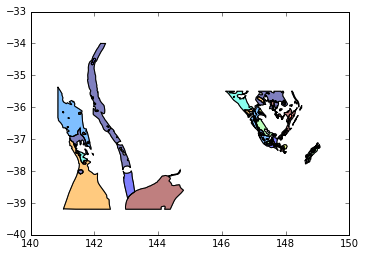

In [9]:
df.plot()

##Slicing, queries and sorting with <span style="color:green">GeoPandas</span> 


In [10]:
#Sorting

df.set_index('UFI', inplace=True)
sort = df.sort()
sort.head()

,FAC_SERIES,FEATURE,METAGRADE,OBSERVMETH,geometry
UFI,,,,,
2,None,MM_VOID,None,None,"POLYGON ((141.9264774166667 -34.590048675, 141..."
3,None,REGION_META,CAMBRIAN ABOVE CHLORITE GRADE,COMBINED GEOPHYSICS,POLYGON ((140.8579321583333 -35.37368118333333...
7,None,MM_VOID,None,None,POLYGON ((147.4577395916667 -35.57525893333333...
8,None,MM_VOID,None,None,"POLYGON ((147.3889448 -35.65604311666667, 147...."
9,None,MM_VOID,None,None,"POLYGON ((146.374268675 -35.68083945, 146.3726..."


In [11]:
df.METAGRADE.unique() 

array([u'CAMBRIAN MIGMATITE', None, u'SILURIAN ABOVE CHLORITE GRADE',
       u'SILURIAN MIGMATITE', u'CAMBRIAN ABOVE CHLORITE GRADE'], dtype=object)

In [12]:
df1 = df[df.FEATURE.str.contains('REGION_META')]

#df.FEATURE  .str.contains is an iterator, 
#in other words this method is diguising a loop

#df.FEATURE.str.contains('REGION_META')

In [13]:
df2 = df1[df1.METAGRADE.str.contains('CAMBRIAN ABOVE CHLORITE GRADE')]

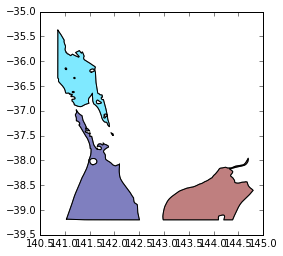

In [14]:
df2.plot()

In [15]:
#Print area, cumulative area
print(df2.area)
#print "The cumulative area is \%" df2.area.sum ()

print "The cumulative area is: {} ".format(df2.area.sum())

UFI
55     1.354897
3      0.755678
66     0.000856
77     1.172857
dtype: float64
The cumulative area is: 3.2842877996 


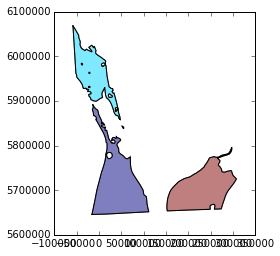

In [16]:
#Reproject the dataframe to MGA zone 55 (I think)
test = df2.to_crs(epsg=28355)
test.plot()

In [17]:
#Calculate area in Projected coordinates (MGA Zone 55)
df2['area'] = df2.to_crs(epsg=28355).area
df2

,FAC_SERIES,FEATURE,METAGRADE,OBSERVMETH,geometry,area
UFI,,,,,,
55,None,REGION_META,CAMBRIAN ABOVE CHLORITE GRADE,COMBINED GEOPHYSICS,"POLYGON ((141.0317513833333 -39.185519675, 141...",1.316214e+10
3,None,REGION_META,CAMBRIAN ABOVE CHLORITE GRADE,COMBINED GEOPHYSICS,POLYGON ((140.8579321583333 -35.37368118333333...,7.568862e+09
66,None,REGION_META,CAMBRIAN ABOVE CHLORITE GRADE,COMBINED GEOPHYSICS,"POLYGON ((141.9695860916667 -37.495168425, 141...",8.436874e+06
77,None,REGION_META,CAMBRIAN ABOVE CHLORITE GRADE,COMBINED GEOPHYSICS,"POLYGON ((144.4207139833333 -38.124138, 144.43...",1.132601e+10


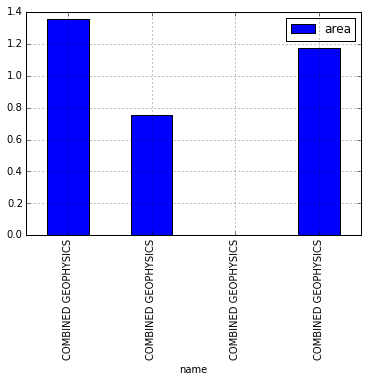

In [18]:
pdf = pd.DataFrame(index=df2.index, columns={})
pdf['area'] = df2.area
pdf['name'] = df2.OBSERVMETH
pdf.index=pdf.name
pdf.plot(kind='bar')

In [19]:
# save resulting shapefile
df2.to_file("test.shp")

In [20]:
import geojsonio

# Shoot to a gist/geojson.io!
res = geojsonio.display(df.to_json(), force_gist=True)
print(res)

http://geojson.io/#id=gist:/8ff80f907198955db4af


In [21]:
print("https://gist.github.com/anonymous/%s" % res[res.find("gist:/")+6:])    

https://gist.github.com/anonymous/8ff80f907198955db4af


##Rasters and images with <span style="color:green">Rasterio and numpy</span>

 * Rasterio is a python interface to GDAL
 *  open() gives you a file-like dataset object
 * read() gives you a Numpy ndarray
 * Read windows of data with extended slice-like syntax

In [22]:
import os
import rasterio
filename = os.path.join('..', 'data','rasters', 'flinders.tif')
dataset = rasterio.open(filename)


bounds = dataset.bounds[::2] + dataset.bounds[1::2]

In [23]:
print(dataset.meta)

{'count': 1, 'crs': {'init': u'epsg:4326'}, 'dtype': 'float32', 'affine': Affine(0.00011111111111111112, 0.0, 137.99994444444445,
       0.0, -0.00011111111111111112, -30.999944444444445), 'driver': u'GTiff', 'transform': (137.99994444444445, 0.00011111111111111112, 0.0, -30.999944444444445, 0.0, -0.00011111111111111112), 'height': 5001, 'width': 5001, 'nodata': None}


In [24]:
data = dataset.read_band(1)

In [28]:
#Because it's a numpy ndarray, we have the entire numpy and scipy world available to us to work on the data.
array_chop = data[1000:-1000,1000:-1000]


In [29]:
#############
#Write the data
#############
kwargs = dataset.meta
kwargs['width'] = array_chop.shape[0]
kwargs['height'] = array_chop.shape[1]

with rasterio.open('flinders.tif', 'w', **kwargs) as dst:
    dst.write_band(1,array_chop)

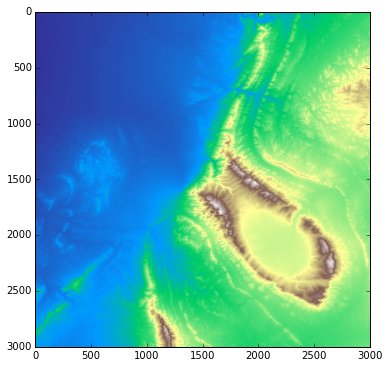

In [30]:
filename = os.path.join('flinders.tif')
dataset1 = rasterio.open(filename)

image = dataset1.read_band(1)
# Default figure size
plt.rcParams['figure.figsize'] = (6.0, 6.0)
im = plt.imshow(image, cmap='terrain')



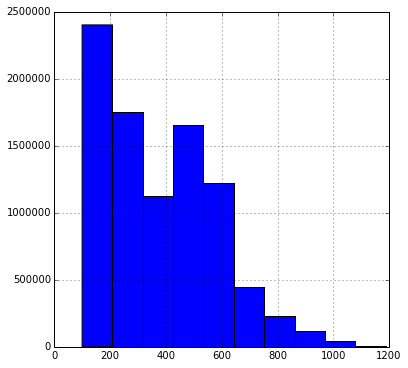

In [31]:
#Histogram

n, bins, patches = plt.hist(image.flatten())
plt.grid()
plt.show()   

In [32]:
# http://geoexamples.blogspot.dk/2014/03/shaded-relief-images-using-gdal-python.html
def hillshade(array, azimuth, angle_altitude):  
    x, y = np.gradient(array, 5., 5.)  
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y) )  
    aspect = np.arctan2(-x, y)  
    azimuthrad = azimuth * np.pi / 180.  
    altituderad = angle_altitude * np.pi / 180.  
       
    shaded = np.sin(altituderad) * np.sin(slope)\
           + np.cos(altituderad) * np.cos(slope)\
           * np.cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2 

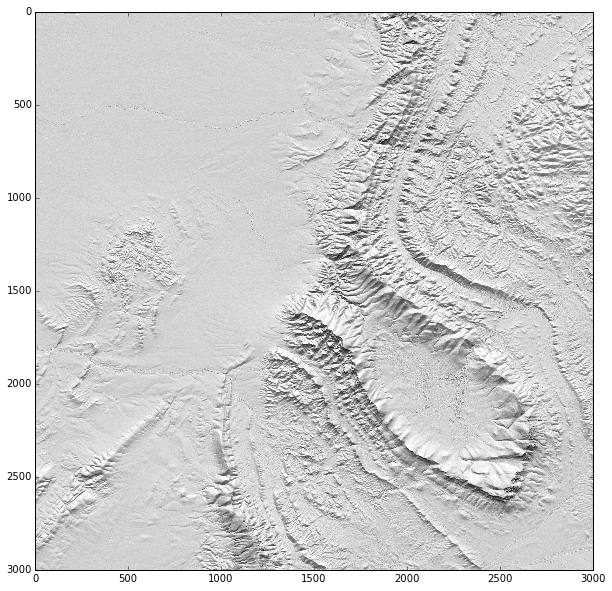

In [33]:
shade = hillshade(image, 270, 45)
plt.rcParams['figure.figsize'] = (10.0, 10.0)
im = plt.imshow(shade, cmap='gray')

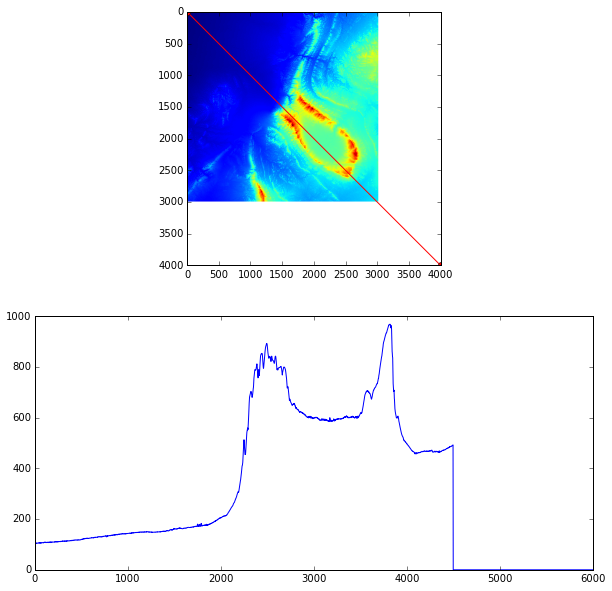

In [34]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import scipy.misc # ADDED THIS LINE

z = image

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 5, 5 # These are in _pixel_ coordinates!!
x1, y1 = 4000, 4000
num = 6000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(np.transpose(z), np.vstack((x,y))) # THIS SEEMS TO WORK CORRECTLY

#-- Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()





The old way is python bindings to ogr/gdal

    from osgeo import gdal
    from osgeo import ogr
    from osgeo import osr
    from osgeo import gdal_array
    from osgeo import gdalconst
    
These are SWIG generated Python bindings for GDAL and OGR. 

#Georeferencing


##<span style="color:orange">Proj.4 (Cartographic Projections Library)</span>



* Originally written by Gerald Evenden then of the USGS (C++)
* Now maintained and copyright Frank Warmerdam
* Comprehensive list of existing projections and tool for transforming between CRSs and Projections
* Open Source Geospatial Foundation (OSGeo) project



##<span style="color:orange">PyProj (Python Interface to PROJ.4 Library)</span>

* Optimized for objects that support the Python buffer protocol (regular python and numpy array objects)
* Performs cartographic transformations and geodetic computations
* Cython wrapper to provide python interfaces to PROJ.4
* MIT Licenced
* Fiona and Rasterio also use proj4, but store the information as a python dict


##Converting Coordinates with <span style="color:green">PyProj</span>

In [35]:
from pyproj import Proj

# Create projection transformation object
p = Proj(init='epsg:3857') # EPSG code for Web Mercator

# Convert from long/lat to Mercator and back
print(p(-97.740372, 30.282642))
print(p(-10880408.440985134, 3539932.8204972977, inverse=True))

(-10880408.440985134, 3539932.8204972977)
(-97.740372, 30.282642000000003)


In [36]:
# Fiona has several helper functions for working with proj4 strings
from fiona.crs import to_string, from_epsg, from_string

# Create a crs dict from a proj4 string
crs = from_string('+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666 '
                  '+lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 '
                  '+y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=us-ft +no_defs')

# Using a proj4 string
nyc_proj = Proj(crs, preserve_units=True)

# Using an EPSG code
nyc_epsg = Proj(init='epsg:2263', preserve_units=True)

In [37]:
print(nyc_proj(-97.740372, 30.282642))

(-6539019.907374031, -2593028.1211364972)


In [38]:
nyc_proj.srs

'+lon_0=-74 +ellps=GRS80 +y_0=0 +no_defs=True +proj=lcc +x_0=300000.0 +units=us-ft +towgs84=0,0,0,0,0,0,0 +lat_2=40.6666666667 +lat_1=41.0333333333 +lat_0=40.1666666667 '

In [39]:
nyc_epsg.srs

'+init=epsg:2263 '